Initial row count: 5572
Row count after removing duplicates: 5169

Top 10 Spam Keywords: [('call', 303), ('you', 259), ('your', 241), ('free', 188), ('for', 184), ('or', 157), ('now', 156), ('txt', 126), ('on', 121), ('from', 119)]

Average Spam Length: 137.89
Average Ham Length: 70.46

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       889
           1       1.00      0.63      0.78       145

    accuracy                           0.95      1034
   macro avg       0.97      0.82      0.87      1034
weighted avg       0.95      0.95      0.94      1034



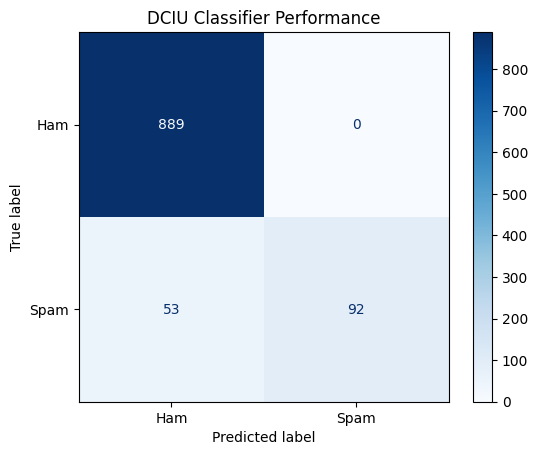

In [24]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# DATA LOADING & STRUCTURAL CLEANING ---
# Loading with latin-1 to handle special characters in SMS
df = pd.read_csv('spam_dataset.csv', encoding='latin-1')

# Dropping unnecessary columns and renaming for clarity
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore')
df.columns = ['label', 'message']

# Check for and remove duplicates
print(f"Initial row count: {len(df)}")
df = df.drop_duplicates(keep='first')
print(f"Row count after removing duplicates: {len(df)}")

# TEXT PREPROCESSING
# Manual list of stopwords to ensure the script runs anywhere
stop_words = set(['i', 'me', 'my', 'the', 'is', 'at', 'to', 'in', 'it', 'of', 'and', 'a', 'u', 'ur', '2', '4'])

def clean_text(text):
    # Lowercase & Strip whitespaces
    text = text.lower().strip()
    # 2. Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # 3. Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Applying the cleaning process
df['cleaned_message'] = df['message'].apply(clean_text)
df['message_length'] = df['message'].apply(len)

# ANALYSIS (Answering Business Questions) ---

# Most common words
spam_words = " ".join(df[df['label'] == 'spam']['cleaned_message']).split()
top_10_spam = Counter(spam_words).most_common(10)
print("\nTop 10 Spam Keywords:", top_10_spam)

# Length comparison
avg_spam_len = df[df['label'] == 'spam']['message_length'].mean()
avg_ham_len = df[df['label'] == 'ham']['message_length'].mean()
print(f"\nAverage Spam Length: {avg_spam_len:.2f}")
print(f"Average Ham Length: {avg_ham_len:.2f}")

# MODELING & EVALUATION 

# Prepare data
X = df['cleaned_message']
y = df['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Evaluation
y_pred = model.predict(X_test_tfidf)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizing the Confusion Matrix for the Report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title('DCIU Classifier Performance')
plt.show()